# Simple RNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
t = np.arange(0, 1000)
x = np.sin(0.02 * t) + np.random.rand(1000)
train, test = x[0:800], x[800:1000]
plt.plot(x)

preprocessing

In [ ]:
def convert_to_matrix(data, step):
    x, y = [], []
    for i in range(len(data) - step):
        d = i + step
        x.append(data[i:d])
        y.append(data[d])
    return np.array(x), np.array(y)

##
train = np.append(train, np.repeat(train[-1], 4))
test = np.append(test, np.repeat(test[-1], 4))
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(train[:50])
plt.title(f'train, shape : {train.shape}')
print('train')
print(train[:5])

##
train_x, train_y = convert_to_matrix(train, 4)
test_x, test_y = convert_to_matrix(test, 4)
plt.subplot(122)
plt.plot(train_x[:50])
plt.title(f'convert_to_matrix, shape : {train_x.shape}')
print()
print('convert_to_matrix')
print(train_x[:5])
plt.show()

## 
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
print('reshape_train_x')
print(f'shape : {train_x.shape}')
print(train_x[:5])
print('➕')
print('reshape_test_x')
print(f'shape : {test_x.shape}')
print(test_x[:5])

model

In [ ]:
train_x.shape

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,4), activation='relu', return_sequences=True))
model.add(SimpleRNN(units=16, activation='relu', return_sequences=True))
model.add(SimpleRNN(units=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
model.summary()

# train
history = model.fit(train_x, train_y, epochs=30)

# predict
pred = model.predict(test_x)

plt.plot(pred)
plt.plot(test_y)

# LSTM

In [ ]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
df = fdr.DataReader('005930', '2018-05-04', '2020-01-22')
df

In [ ]:
_df = df[['Open','High','Low','Volume', 'Close']].copy()

for col in _df.columns:
    scaler = MinMaxScaler()
    _df[col] = scaler.fit_transform(_df[[col]])
dfx = _df[['Open','High','Low','Volume']]
dfy = _df[['Close']]

x = dfx.values.tolist()
y = dfy.values.tolist()

In [ ]:
window_size = 7
data_x, data_y = [], []

for i in range(len(y) - window_size):
    _x = x[i:i+window_size]
    _y = y[i+window_size]
    data_x.append(_x)
    data_y.append(_y)

In [ ]:
train_size = int(len(data_y) * 0.8)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_x.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_x.shape, test_y.shape)

In [ ]:
model = Sequential()
model.add(LSTM(units=20, activation='tanh', input_shape=(7,4)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(train_x, train_y, epochs=100)

pred_y = model.predict(test_x)

plt.plot(test_y)
plt.plot(pred_y)
plt.show()

window:5 - loss : 0.0041 (SGD)

window:7 - loss : 0.0034 (SGD, 오버피팅 의심)

window:7 - loss : 0.0012 (adam)

add layer

In [ ]:
model2 = Sequential()
model2.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(7,4)))
model2.add(LSTM(40, activation='relu', return_sequences=True))
model2.add(LSTM(5, activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse')

model2.summary()
model2.fit(train_x, train_y, epochs=100)

pred2 = model2.predict(test_x)
plt.plot(test_y)
plt.plot(pred2)
plt.show()

# Oil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
df = pd.read_csv('./data/BrentOilPrices.csv')
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


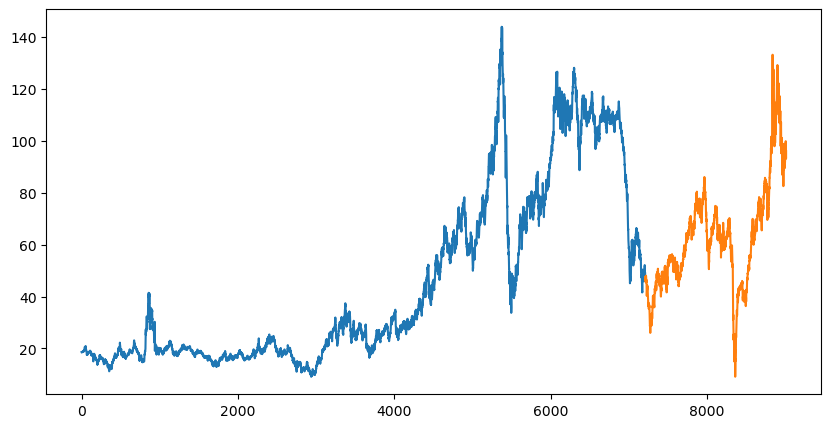

In [3]:
df = df[['Price']].copy()
split_size = int(len(df) * 0.8)
train, test = df[0:split_size], df[split_size:]
plt.figure(figsize=(10,5))
plt.plot(train)
plt.plot(test)

In [4]:
def convert_to_matrix(data, step):
    x, y = [], []
    for i in range(len(data) - step):
        d = i + step
        x.append(data[i:d])
        y.append(data[d])
    return np.array(x), np.array(y)

In [5]:
train = train.values
test = test.values

train
[18.63 18.45 18.55 18.6  18.63]

convert_to_matrix
[[18.63 18.45 18.55 18.6  18.63 18.6  18.6  18.58 18.65 18.68]
 [18.45 18.55 18.6  18.63 18.6  18.6  18.58 18.65 18.68 18.75]
 [18.55 18.6  18.63 18.6  18.6  18.58 18.65 18.68 18.75 18.78]
 [18.6  18.63 18.6  18.6  18.58 18.65 18.68 18.75 18.78 18.65]
 [18.63 18.6  18.6  18.58 18.65 18.68 18.75 18.78 18.65 18.75]]


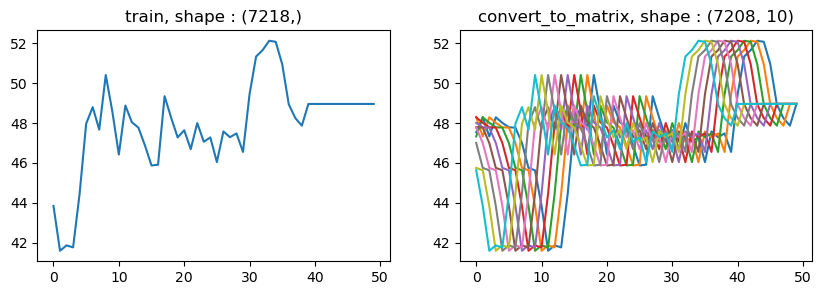

reshape_train_x
shape : (7208, 1, 10)
[[[18.63 18.45 18.55 18.6  18.63 18.6  18.6  18.58 18.65 18.68]]

 [[18.45 18.55 18.6  18.63 18.6  18.6  18.58 18.65 18.68 18.75]]

 [[18.55 18.6  18.63 18.6  18.6  18.58 18.65 18.68 18.75 18.78]]

 [[18.6  18.63 18.6  18.6  18.58 18.65 18.68 18.75 18.78 18.65]]

 [[18.63 18.6  18.6  18.58 18.65 18.68 18.75 18.78 18.65 18.75]]]
➕
reshape_test_x
shape : (1803, 1, 10)
[[[47.51 46.93 46.72 46.59 46.3  46.57 45.54 47.6  48.04 48.  ]]

 [[46.93 46.72 46.59 46.3  46.57 45.54 47.6  48.04 48.   47.91]]

 [[46.72 46.59 46.3  46.57 45.54 47.6  48.04 48.   47.91 48.  ]]

 [[46.59 46.3  46.57 45.54 47.6  48.04 48.   47.91 48.   46.96]]

 [[46.3  46.57 45.54 47.6  48.04 48.   47.91 48.   46.96 47.19]]]
🔻
train_shape : (7208, 1, 10)
test_shape : (1803, 1, 10)


In [6]:
##
train = np.append(train, np.repeat(train[-1], 10))
test = np.append(test, np.repeat(test[-1], 10))
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(train[-50:])
plt.title(f'train, shape : {train.shape}')
print('train')
print(train[:5])

##
train_x, train_y = convert_to_matrix(train, 10)
test_x, test_y = convert_to_matrix(test, 10)
plt.subplot(122)
plt.plot(train_x[-50:])
plt.title(f'convert_to_matrix, shape : {train_x.shape}')
print()
print('convert_to_matrix')
print(train_x[:5])
plt.show()

## 
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
print('reshape_train_x')
print(f'shape : {train_x.shape}')
print(train_x[:5])
print('➕')
print('reshape_test_x')
print(f'shape : {test_x.shape}')
print(test_x[:5])
print('🔻')
print(f'train_shape : {train_x.shape}')
print(f'test_shape : {test_x.shape}')

LSTM

In [12]:
model = Sequential()
model.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(1, 10)))
model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(LSTM(5, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# tf.keras.metrics.MeanSquaredLogarithmicError()
# tf.keras.metrics.RootMeanSquaredError()

model.summary()

model.fit(train_x, train_y, epochs=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 1, 30)             4920      
                                                                 
 lstm_10 (LSTM)              (None, 1, 20)             4080      
                                                                 
 lstm_11 (LSTM)              (None, 5)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 9526 (37.21 KB)
Trainable params: 9526 (37.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
226/226 [==============================] - 2s 1ms/step - loss: 655.0364 - mse: 655.0364
Epoch 2/10
226/226 [==============================] -

 1/57 [..............................] - ETA: 0s

57/57 [==============================] - 0s 859us/step


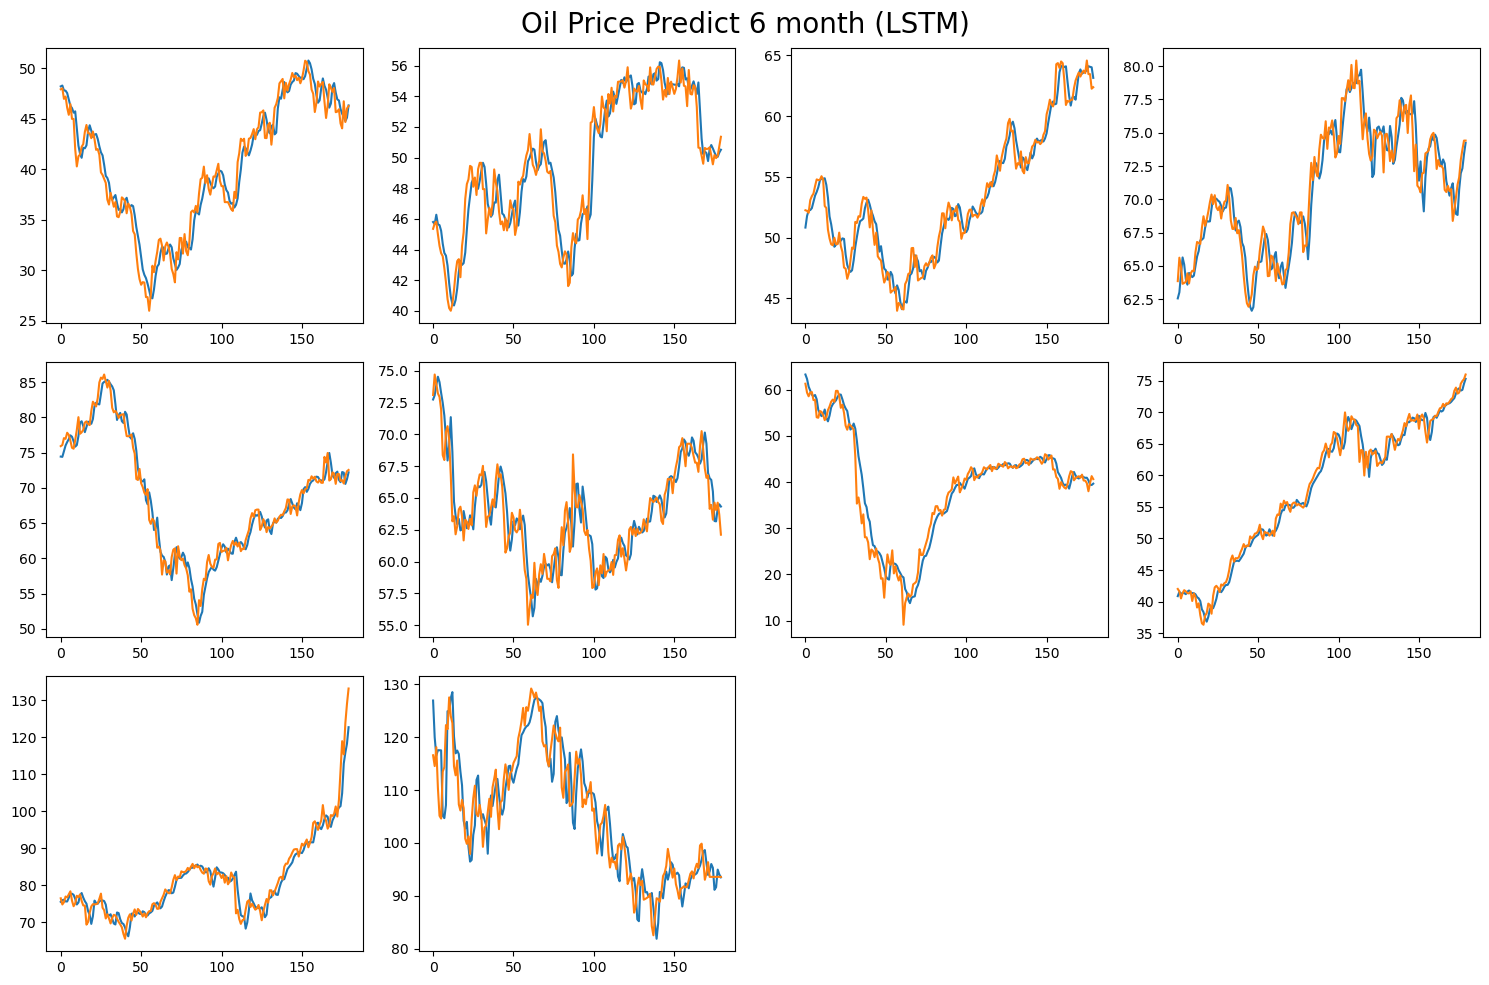

In [41]:
pred = model.predict(test_x)

plt_len = int(len(pred) * 0.1)
plt.figure(figsize=(15,10))
plt.suptitle('Oil Price Predict 6 month (LSTM)', fontsize=20)
for i in range(1, 11):
    plt.subplot(3, 4, i)
    plt.plot(pred[plt_len*(i-1) : plt_len*i])  #[-100:])
    plt.plot(test_y[plt_len*(i-1) : plt_len*i])#[-100:])
plt.tight_layout()
plt.show()